In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing import identify_irrelevant_object_columns, identify_columns_not_enough_values

In [23]:
iter_csv = pd.read_csv('data/train.csv', iterator=True, chunksize=20000)
#df = pd.concat([chunk[chunk['field'] > constant] for chunk in iter_csv])

In [24]:
df = next(iter_csv)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
MachineIdentifier                                    20000 non-null object
ProductName                                          20000 non-null object
EngineVersion                                        20000 non-null object
AppVersion                                           20000 non-null object
AvSigVersion                                         20000 non-null object
IsBeta                                               20000 non-null int64
RtpStateBitfield                                     19929 non-null float64
IsSxsPassiveMode                                     20000 non-null int64
DefaultBrowsersIdentifier                            927 non-null float64
AVProductStatesIdentifier                            19917 non-null float64
AVProductsInstalled                                  19917 non-null float64
AVProductsEnabled                                    19917 non-nul

In [26]:
df.head(5)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


# delete irrelevant object columns

In [28]:
# delete object columns that have so many categories inside that no general rule can be derived from them (estimated)
irrelevant_object_columns = identify_irrelevant_object_columns(df, 0.001)
irrelevant_object_columns

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsBuildLab',
 'Census_ChassisTypeName',
 'Census_OSVersion']

In [29]:
df.drop(irrelevant_object_columns, axis=1, inplace=True)

In [30]:
df.head(5)

,ProductName,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,0,7.0,0,NaN,53447.0,1.0,1.0,1,18,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


# delete columns with not enough values

In [31]:
# delete columns that have not enough values, aka less than 75% of total # of rows
cols = identify_columns_not_enough_values(df)
cols

['DefaultBrowsersIdentifier',
 'OrganizationIdentifier',
 'PuaMode',
 'SmartScreen',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [32]:
df.drop(cols, axis=1, inplace=True)
df.head(5)

,ProductName,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1


# analyzing categorical columns

In [97]:
# analyzing categorical columns: prep: grouping per categories, then 
#1 observing standard dev over mean(has detections) --> should be high, aka high deltas
#2 observing std over count of values within the groups --> should be low, aka evenly distributed.

categorical_columns =  list(df.select_dtypes(include=['object']))
labels = []
mean_std = []
count_std = []

for col in categorical_columns:
    means = df[[col, "HasDetections"]].groupby(col)
    #stds[col] = (means.mean().std().values[0], means.count().std().values[0])
    labels.append(col)
    mean_std.append(means.mean().std().values[0]) #--> should be high for best significance
    count_std.append(means.count().std().values[0])  #--> should be low for best significance
    #single_kpi = temp
    
scatter = pd.DataFrame()
scatter["labels"] = labels
scatter["mean_std"] = mean_std
scatter["count_std"] = count_std

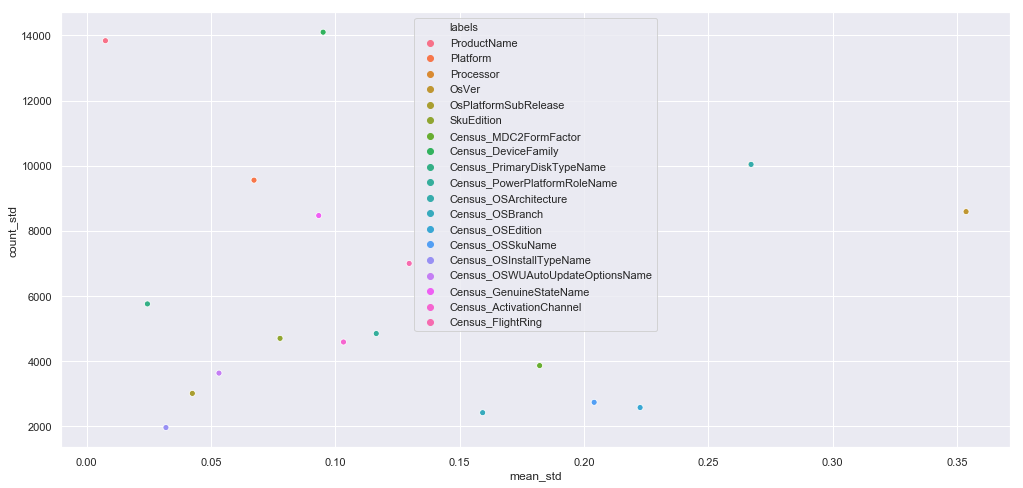

In [126]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
ax = sns.scatterplot(x="mean_std", y="count_std",data=scatter, hue="labels")

In [102]:
scatter.sort_values(by="mean_std", ascending = False)
#--> would make sense to automatically identify features from the quadrant in the bottom right and ignore the rest.

,labels,mean_std,count_std
3,OsVer,0.353653,8586.089302
10,Census_OSArchitecture,0.267205,10037.443914
2,Processor,0.267047,10041.535009
12,Census_OSEdition,0.222588,2567.121981
13,Census_OSSkuName,0.204106,2727.065604
6,Census_MDC2FormFactor,0.182187,3855.788864
11,Census_OSBranch,0.159279,2408.771813
18,Census_FlightRing,0.129736,6994.701719
9,Census_PowerPlatformRoleName,0.116489,4840.704996
17,Census_ActivationChannel,0.103318,4579.832995


In [89]:
dimension = "OsVer"
df[[dimension, "HasDetections"]].groupby(dimension).mean().std() #--> should be high

HasDetections    0.353653
dtype: float64

In [90]:
df[[dimension, "HasDetections"]].groupby(dimension).count().std() #--> should be low

HasDetections    8586.089302
dtype: float64

In [91]:
df[[dimension, "HasDetections"]].groupby(dimension).mean()

,HasDetections
OsVer,
10.0.0.0,0.501240
10.0.1.44,0.000000
6.1.0.0,1.000000
6.1.1.0,0.509346
6.3.0.0,0.485981


# Analyzing numerical features

In [133]:
df.groupby("HasDetections").mean()
#---> make percentage of max-min from max --> relevance of the differences!

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_IsFlightsDisabled,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
HasDetections,,,,,,,,,,,,,,,,,,,,,
0,0.0,6.818758,0.018938,46276.995169,1.396678,1.025969,0.988477,107.923046,81814.993749,169.566333,...,0.0,404.262645,32841.403437,0.488677,0.011035,0.140681,0.038978,0.070434,0.256503,7.889244
1,0.0,6.888511,0.013074,49446.412242,1.245642,1.013023,0.987924,109.413174,81078.585861,170.627146,...,0.0,395.129754,32834.561263,0.482934,0.002500,0.108683,0.037026,0.043618,0.302008,7.791451


In [136]:
df.groupby("HasDetections").mean().std()

IsBeta                                               0.000000e+00
RtpStateBitfield                                     4.932256e-02
IsSxsPassiveMode                                     4.146491e-03
AVProductStatesIdentifier                            2.241116e+03
AVProductsInstalled                                  1.067988e-01
AVProductsEnabled                                    9.153748e-03
HasTpm                                               3.908902e-04
CountryIdentifier                                    1.053679e+00
CityIdentifier                                       5.207190e+02
GeoNameIdentifier                                    7.501081e-01
LocaleEnglishNameIdentifier                          2.460149e+00
OsBuild                                              8.240077e+01
OsSuite                                              1.327820e+01
IsProtected                                          1.835588e-02
AutoSampleOptIn                                      0.000000e+00
SMode     

# create dummies

In [11]:
object_columns = list(df.select_dtypes(include=['object']))
df_encoded = pd.get_dummies(df, prefix=object_columns)
df_encoded.shape
df_encoded.head(5)

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,...,Census_ActivationChannel_Retail:TB:Eval,Census_ActivationChannel_Volume:GVLK,Census_ActivationChannel_Volume:MAK,Census_FlightRing_Disabled,Census_FlightRing_NOT_SET,Census_FlightRing_RP,Census_FlightRing_Retail,Census_FlightRing_Unknown,Census_FlightRing_WIF,Census_FlightRing_WIS
0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,35.0,...,0,0,0,0,0,0,1,0,0,0
1,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,119.0,...,0,0,0,0,1,0,0,0,0,0
2,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,64.0,...,0,0,0,0,0,0,1,0,0,0
3,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,117.0,...,0,0,0,0,0,0,1,0,0,0
4,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,277.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# alternative idea: keep all features, factorize or one-hot everything, then do pca and then neural network.

# remaining columns:

In [12]:
list(df)

['ProductName',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_Inter

In [15]:
list(df_encoded)

['IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsPortableO

In [17]:
corr = df_encoded.corr()

In [18]:
corr["HasDetections"]

IsBeta                                                                         NaN
RtpStateBitfield                                                          0.038049
IsSxsPassiveMode                                                         -0.030734
AVProductStatesIdentifier                                                 0.116914
AVProductsInstalled                                                      -0.146059
AVProductsEnabled                                                        -0.040288
HasTpm                                                                    0.004921
CountryIdentifier                                                         0.008077
CityIdentifier                                                           -0.002561
GeoNameIdentifier                                                         0.005654
LocaleEnglishNameIdentifier                                               0.013868
OsBuild                                                                   0.025837
OsSu

In [43]:
def feature_combination_finder(df, y_column, min_group_size, level=2):
    '''returns df of possible interaction terms of categorical columns with minimum avg group size 
    Supports only level=2 so far'''
    #initiate variables
    combinations = []
    #combinations = pd.DataFrame(columns = ("Col1", "Col2", "Std"))
    #combinations = combinations.set_index(["Col1", "Col2"])
    y_column = y_column
    all_x_columns = list(df)
    relevant_columns = []

    #determine columns with categorical data
    for col in all_x_columns:
        avg_groupsize = df.groupby([col])[col].count().mean()
        if avg_groupsize >= min_group_size: 
            relevant_columns.append(col)
    relevant_columns.remove(y_column)

    if level == 2:
        #combinations = pd.DataFrame(index ="Index", columns="Std")
        combinations = pd.DataFrame(columns = ("Col1", "Col2", "Std"))
        combinations = combinations.set_index(["Col1", "Col2"])
        for col1 in relevant_columns:
            list2 = relevant_columns
            for col2 in list2:
                if col1 == col2:
                    continue
                std = df.groupby([col1, col2])[y_column].mean().std()
                label = str(col1) + "_" + str(col2) 
                combinations.loc[label] = std
    return combinations

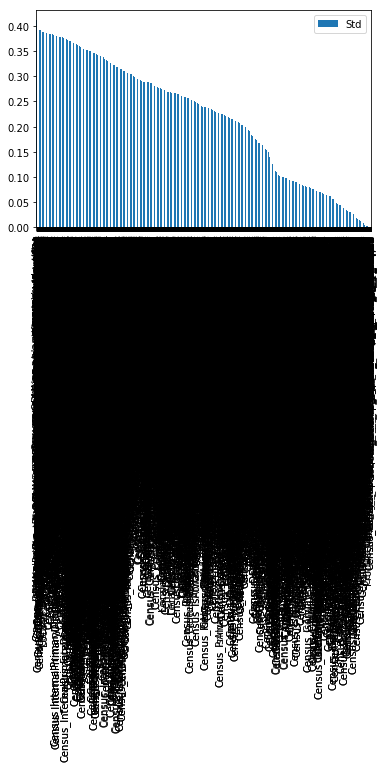

In [44]:
combinations = feature_combination_finder(df_encoded, "HasDetections", 50, 2)
combinations.sort_values(by = "Std", ascending = False).plot.bar()

In [51]:
combinations.sort_values(by="Std")

,Std
HasTpm_IsBeta,0.000259
IsBeta_HasTpm,0.000259
HasTpm_AutoSampleOptIn,0.000259
AutoSampleOptIn_HasTpm,0.000259
Census_GenuineStateName_IS_GENUINE_IsBeta,0.000469
AutoSampleOptIn_Census_GenuineStateName_IS_GENUINE,0.000469
IsBeta_Census_GenuineStateName_IS_GENUINE,0.000469
Census_GenuineStateName_IS_GENUINE_AutoSampleOptIn,0.000469
Census_GenuineStateName_IS_GENUINE_Census_IsFlightsDisabled,0.000518
Census_IsFlightsDisabled_Census_GenuineStateName_IS_GENUINE,0.000518
